In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import tensorflow as tf
from tensorflow import keras
import cv2
import pandas as pd
#from IPython.display import display
#from IPython.display import Image as _Imgdis
from PIL import Image
import math

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [0]:
import csv
with open('rekt_y.csv', 'r') as file:
    reader = csv.reader(file, delimiter = ',')
    header = next(reader)
    y = []
    for row in reader:
        y.append(row)

In [0]:
y_dat = pd.DataFrame(y)

In [6]:
%cd '/content/drive/My Drive/dest_folder/'

/content/drive/My Drive/dest_folder


## Importing and resizing image

In [0]:
inputImages = []
origImagSize = []
targetSize = (32,32)

for filename in y_dat[0]:
  img = cv2.imread(filename)
  #imread as grayscale
  
  origImagSize.append(img.shape)
  img = cv2.resize(img,targetSize)
  inputImages.append(img)#.reshape(targetSize[0],targetSize[1],1))

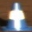

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(inputImages[1])
#plt.imshow(inputImages[1])

In [0]:
images =np.array(inputImages,dtype = 'float32')

# Label processing


In [0]:
y_dat = pd.DataFrame(y_dat.values[:],columns = header )
y_clipped = y_dat[y_dat.columns[2:-1]]
#y_dat.drop(y_dat.index[0])

In [11]:

inpKeypointsX = pd.DataFrame()   
inpKeypointsY = pd.DataFrame()   
for column in y_clipped.columns :
  temp = y_clipped[column].str.strip('[]').str.split(", ",expand = True)
  inpKeypointsX[column+'_x'] = temp[0]
  inpKeypointsY[column+'_y'] = temp[1]
inpKeypointsX  


top_x mid_L_top_x mid_R_top_x mid_L_bot_x mid_R_bot_x bot_L_x bot_R_x
0       14           7          19           5          19       2      21
1       19          12          26          10          28       7      32
2       16           9          20           8          21       4      22
3       11           7          15           6          15       4      16
4       12           6          17           4          19       2      24
...    ...         ...         ...         ...         ...     ...     ...
3192    13           8          16           8          18       6      19
3193    15           9          21           8          23       6      26
3194    20          13          27          10          30       8      35
3195    29          20          35          17          38      12      43
3196    21          15          28          13          31       9      36

[3197 rows x 7 columns]

In [0]:
inpKeypointsX_arr = np.array(inpKeypointsX,dtype= 'float32')
inpKeypointsY_arr = np.array(inpKeypointsY,dtype= 'float32')






# Scaling


In [0]:
def get_scale(orig_im_size ,targetSize):
  target_h, target_w = targetSize
  h_scale = target_h / orig_im_size[0]
  w_scale = target_w / orig_im_size[1]

  return h_scale, w_scale

In [0]:
KeyptsXscaled = pd.DataFrame()  
KeyptsYscaled = pd.DataFrame() 

for i in range(len(inputImages)):
  h_scale_i,w_scale_i = get_scale(origImagSize[i],targetSize) 
  KeyptsXscaled[i] = inpKeypointsX_arr[i]*w_scale_i
  KeyptsYscaled[i] = inpKeypointsY_arr[i]*h_scale_i

In [0]:
KeyptsXscaled = KeyptsXscaled.T
KeyptsYscaled = KeyptsYscaled.T

In [0]:
KeyptsX = pd.DataFrame(data=KeyptsXscaled.values, columns=inpKeypointsX.columns)
KeyptsY = pd.DataFrame(data=KeyptsYscaled.values, columns=inpKeypointsY.columns)

In [0]:

keypt= pd.DataFrame() 
for column in range(len(KeyptsY.columns)):
  keypt[KeyptsX.columns[column]]=KeyptsX.iloc[:,column]
  keypt[KeyptsY.columns[column]]=KeyptsY.iloc[:,column]

In [18]:
keypt = np.ceil(keypt)
keypt

top_x  top_y  mid_L_top_x  ...  bot_L_y  bot_R_x  bot_R_y
0      15.0    1.0          8.0  ...     26.0     23.0     27.0
1      17.0    3.0         11.0  ...     27.0     28.0     27.0
2      19.0    1.0         11.0  ...     27.0     27.0     28.0
3      18.0    0.0         12.0  ...     25.0     26.0     26.0
4      12.0    0.0          6.0  ...     30.0     24.0     29.0
...     ...    ...          ...  ...      ...      ...      ...
3192   17.0    2.0         11.0  ...     26.0     25.0     26.0
3193   13.0    2.0          8.0  ...     27.0     23.0     27.0
3194   15.0    1.0         10.0  ...     27.0     27.0     26.0
3195   19.0    3.0         13.0  ...     27.0     28.0     28.0
3196   15.0    2.0         11.0  ...     27.0     25.0     26.0

[3197 rows x 14 columns]

In [0]:
#ALLL LLEFT SHOYLD BE TPGETTHER AND ALL RIGHT IN CROSS RATIO LSOS

In [20]:
keypt_arr = np.array(keypt,dtype= 'float32')
keypt_arr = keypt_arr/targetSize[0] - 0.5
keypt_arr
#scale between -0.5 and 0.5

array([[-0.03125, -0.46875, -0.25   , ...,  0.3125 ,  0.21875,  0.34375],
       [ 0.03125, -0.40625, -0.15625, ...,  0.34375,  0.375  ,  0.34375],
       [ 0.09375, -0.46875, -0.15625, ...,  0.34375,  0.34375,  0.375  ],
       ...,
       [-0.03125, -0.46875, -0.1875 , ...,  0.34375,  0.34375,  0.3125 ],
       [ 0.09375, -0.40625, -0.09375, ...,  0.34375,  0.375  ,  0.375  ],
       [-0.03125, -0.4375 , -0.15625, ...,  0.34375,  0.28125,  0.3125 ]],
      dtype=float32)

In [0]:
#images = images.reshape(images.shape[0],80,80,3)

images = images/255

In [22]:
print(keypt_arr.shape)
print(type(keypt_arr))
print(images.shape)
print(type(images))

(3197, 14)
<class 'numpy.ndarray'>
(3197, 32, 32, 3)
<class 'numpy.ndarray'>


In [0]:
def plot_keypoints(img,points):
  img = img#.reshape(targetSize[0],targetSize[1])
  plt.imshow(img,cmap='gray')
  for i in range(0,14,2):
    plt.scatter((points[i] + 0.5)*targetSize[0], (points[i+1]+0.5)*targetSize[0], color='red')
    

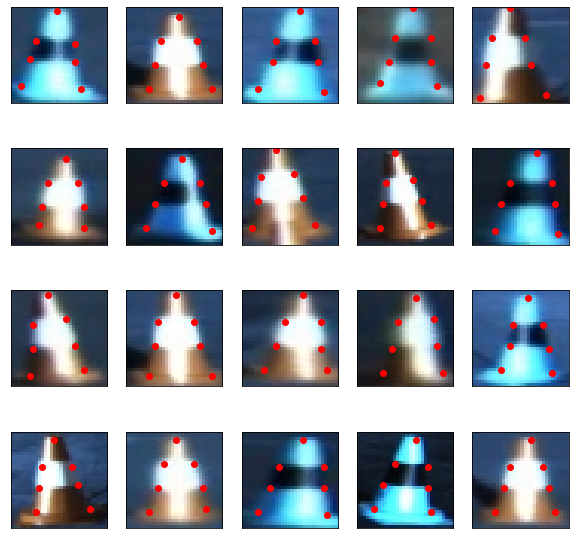

In [24]:
fig = plt.figure(figsize=(10, 10))
for id in range(20):
    ax = fig.add_subplot(4, 5, id + 1, xticks=[], yticks=[])
    plot_keypoints(inputImages[id], keypt_arr[id])

plt.show()

# Augmentation (zoom adjustment not yet used on dataset)

In [0]:

#flip along vertical axis
def lrFlip(img,points):

  new_img = np.copy(img)
  new_img = np.fliplr(new_img) 

  new_points = np.copy(points)
  for i in range(0,len(new_points),2):
    new_points[i] = -points[i]
  
  return new_img, new_points


#ADJUST GAUSSIAN BLUR(?),rotation(?) ETC TOO




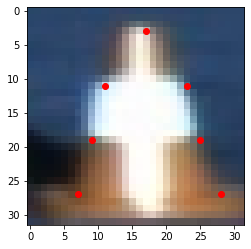

In [26]:
plot_keypoints(images[1], keypt_arr[1])

In [0]:
flipped_images = []
flipped_keypts = []

for i,image in enumerate(images) :
  
  flip_img, flip_points = lrFlip(images[i], keypt_arr[i])
  flipped_images.append(flip_img)#.reshape(targetSize[0],targetSize[1],1))
  flipped_keypts.append(flip_points)

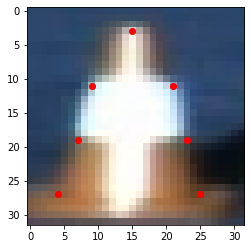

In [28]:
plot_keypoints(flipped_images[1], flipped_keypts[1])

In [0]:
def adj_intensity(img):

  new_img = np.copy(img)
  inc_brightness_images = np.clip(new_img*1.2, 0.0, 1.0)
  dec_brightness_images = np.clip(new_img*0.8, 0.0, 1.0)

  return inc_brightness_images, dec_brightness_images



In [0]:
inc_intensity_images = []
inc_intensity_keypts = []

dec_intensity_images = []
dec_intensity_keypts = []

for i,image in enumerate(images) :
  
  inc_intensity_image, dec_intensity_image = adj_intensity(images[i])

  inc_intensity_images.append(inc_intensity_image)#.reshape(targetSize[0],targetSize[1],1))
  inc_intensity_keypts.append(keypt_arr[i])
  dec_intensity_images.append(dec_intensity_image)#.reshape(targetSize[0],targetSize[1],1))
  dec_intensity_keypts.append(keypt_arr[i])

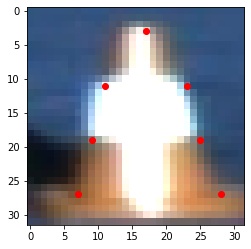

In [31]:

plot_keypoints(inc_intensity_images[1], inc_intensity_keypts[1])



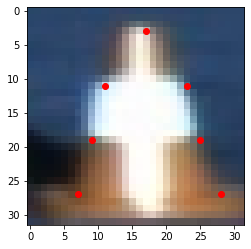

In [32]:
plot_keypoints(images[1], keypt_arr[1])

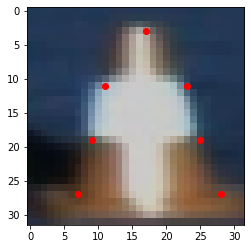

In [33]:
plot_keypoints(dec_intensity_images[1], dec_intensity_keypts[1])

In [0]:
from math import sin, cos, pi


angle = 15
#degrees
center = targetSize[0]/2

rotated_images = []
rotated_keypts = []

for angle in [-angle,angle]:

  RotMat = cv2.getRotationMatrix2D((center,center), angle ,1.0)
  for image in images :
    rotated_image = cv2.warpAffine(image, RotMat, targetSize, flags=cv2.INTER_CUBIC)
    rotated_images.append(rotated_image)#.reshape(targetSize[0],targetSize[1],1))
    

  angle_rad = -angle*pi/180.

  for keypt in keypt_arr:
    rotated_keypt = (keypt)*targetSize[0]
    for x in range(0,len(rotated_keypt),2):
      rotated_keypt[x] = rotated_keypt[x]*cos(angle_rad) - rotated_keypt[x+1]*sin(angle_rad)
      #x+1 is y
      rotated_keypt[x+1] = rotated_keypt[x]*sin(angle_rad) + rotated_keypt[x+1]*cos(angle_rad)
    
    rotated_keypt = (rotated_keypt)/targetSize[0]
    rotated_keypts.append(rotated_keypt)
      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


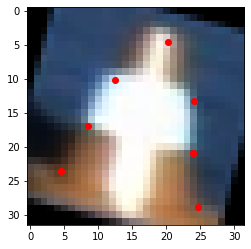

In [35]:
plot_keypoints(rotated_images[1], rotated_keypts[1])



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


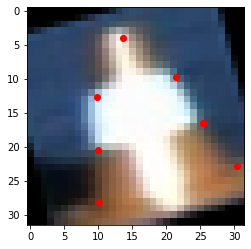

In [36]:
plot_keypoints(rotated_images[3198], rotated_keypts[3198])

In [0]:
rotated_images_arr = np.array(rotated_images,dtype= 'float32')
rotated_keypts_arr = np.array(rotated_keypts,dtype= 'float32')
flipped_images_arr = np.array(flipped_images,dtype= 'float32')
flipped_keypts_arr = np.array(flipped_keypts,dtype= 'float32')

inc_intensity_images_arr = np.array(inc_intensity_images,dtype= 'float32')
inc_intensity_keypts_arr = np.array(inc_intensity_keypts,dtype= 'float32')
dec_intensity_images_arr = np.array(dec_intensity_images,dtype= 'float32')
dec_intensity_keypts_arr = np.array(dec_intensity_keypts,dtype= 'float32')


In [38]:
print(rotated_keypts_arr.shape)
print(type(rotated_keypts_arr))
print(rotated_images_arr.shape)
print(type(rotated_images_arr))

(6394, 14)
<class 'numpy.ndarray'>
(6394, 32, 32, 3)
<class 'numpy.ndarray'>


In [39]:
print(flipped_keypts_arr.shape)
print(type(flipped_keypts_arr))
print(flipped_images_arr.shape)
print(type(flipped_images_arr))

(3197, 14)
<class 'numpy.ndarray'>
(3197, 32, 32, 3)
<class 'numpy.ndarray'>


In [40]:
print(keypt_arr.shape)
print(type(keypt_arr))
print(images.shape)
print(type(images))

(3197, 14)
<class 'numpy.ndarray'>
(3197, 32, 32, 3)
<class 'numpy.ndarray'>


In [0]:

keypts_final = np.concatenate((keypt_arr, flipped_keypts_arr))
keypts_final = np.concatenate((keypts_final, rotated_keypts_arr))
keypts_final = np.concatenate((keypts_final, inc_intensity_keypts_arr))
keypts_final = np.concatenate((keypts_final, dec_intensity_keypts_arr))

images_final =  np.concatenate((images, flipped_images_arr))
images_final =  np.concatenate((images_final, rotated_images_arr))
images_final =  np.concatenate((images_final, inc_intensity_images_arr))
images_final =  np.concatenate((images_final, dec_intensity_images_arr))


In [42]:
print(keypts_final.shape)
print(type(keypts_final))
print(images_final.shape)
print(type(images_final))

(19182, 14)
<class 'numpy.ndarray'>
(19182, 32, 32, 3)
<class 'numpy.ndarray'>




```
# 
```



#   Model Architecture


In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(images_final, keypts_final, test_size=0.2, random_state=42)

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, AvgPool2D, BatchNormalization, Dropout, Activation, MaxPooling2D,Add,Input
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow import keras
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint, History
from tensorflow.keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

Using TensorFlow backend.


In [0]:

def ResNetBlock(input_data,C):

  x = Conv2D(filters=C,kernel_size=(3,3),padding='same',dilation_rate=(2,2))(input_data)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  #LeakyReLU(alpha = 0.1)

  x = Conv2D(filters= C,kernel_size=(3,3),padding='same')(x)
  x = BatchNormalization()(x)
  #x = Dropout(0.2)(x)

  x_shortcut = Conv2D(filters=C,kernel_size=(1,1),padding='same')(input_data)
  x_shortcut = BatchNormalization()(x_shortcut)

  x = Add()([x,x_shortcut])
  x = Dropout(0.4)(x)

  x = Activation('relu')(x)
  #LeakyReLU(alpha = 0.1)
  #Dropout()?

  return x

In [0]:
filters = 64

In [0]:

#hist = History()

inputs = tf.keras.Input(shape = (targetSize[0],targetSize[0],3))

x = tf.keras.layers.Conv2D(filters=filters,kernel_size=7,strides=(1,1),padding='same',kernel_initializer='he_normal')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
#LeakyReLU(alpha = 0.1)
x = Dropout(0.2)(x)
x = ResNetBlock(x,16)
x = ResNetBlock(x,32)
#x = ResNetBlock(x,32)
#x = ResNetBlock(x,128)
#x = Conv2D(filters=32,kernel_size=(3,3),padding='same',dilation_rate=(2,2))(x)
#x = BatchNormalization()(x)
#x = Activation('relu')(x)

x = Flatten()(x)
outputs = Dense(14)(x)
CRmodel  = Model(inputs , outputs)

#Same convolutions using a 3×3 kernel via a residual block
#C= 64,C= 128,C= 256 and C= 512 for dhal et al 2019 , filters = 64


In [49]:
CRmodel.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [50]:
print(X_train.shape)


(15345, 32, 32, 3)


# Cross-Ratio Loss

In [0]:
from keras import backend as k

In [0]:
@tf.function()
def delta2D(pointA_x,pointA_y,pointB_x,pointB_y):
  return k.sqrt(k.square(pointA_y-pointB_y)+k.square(pointA_x-pointB_x))


In [0]:
@tf.function()
def cross_ratio(point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y):
  num = delta2D(point1_x,point1_y,point3_x,point3_y)/delta2D(point2_x,point2_y,point3_x,point3_y)
  den = delta2D(point2_x,point2_y,point3_x,point3_y)/delta2D(point2_x,point2_y,point4_x,point4_y)
  return num/den



In [0]:
gamma = 0.0001
cr3D = 1.39408

@tf.function()

def cross_ratio_loss(y_true,y_pred):
  
  #point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y,point5_x,point5_y,point6_x,point6_y,point7_x,point7_y = y_true
  #point1_x_pred,point1_y_pred,point2_x_pred,point2_y_pred,point3_x_pred,point3_y_pred,point4_x_pred,point4_y_pred,point5_x_pred,point5_y_pred,point6_x_pred,point6_y_pred,point7_x_pred,point7_y_pred = y_pred

  #use loop 
  cr_left_arm = cross_ratio(y_true[:,0],y_true[:,1],y_true[:,2],y_true[:,3],y_true[:,6],y_true[:,7],y_true[:,10],y_true[:,11])#(point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y)
  cr_right_arm = cross_ratio(y_true[:,0],y_true[:,1],y_true[:,4],y_true[:,5],y_true[:,8],y_true[:,9],y_true[:,12],y_true[:,13])#(point1_x,point1_y,point5_x,point5_y,point6_x,point6_y,point7_x,point7_y)
  #use loop 
  #sum_points_x = k.square(point1_x-point1_x_pred) + k.square(point2_x-point2_x_pred) + k.square(point3_x-point3_x_pred) +k.square(point4_x-point4_x_pred) +k.square(point5_x-point5_x_pred) +k.square(point6_x-point6_x_pred) +k.square(point7_x-point7_x_pred)  
  #sum_points_y = k.square(point1_y-point1_y_pred) + k.square(point2_y-point2_y_pred) + k.square(point3_y-point3_y_pred) +k.square(point4_y-point4_y_pred) +k.square(point5_y-point5_y_pred) +k.square(point6_y-point6_y_pred) +k.square(point7_y-point7_y_pred) 
  sum_points_x = k.square(y_true[:,0]-y_pred[:,0]) + k.square(y_true[:,2]-y_pred[:,2]) + k.square(y_true[:,6]-y_pred[:,6]) +k.square(y_true[:,10]-y_pred[:,10]) +k.square(y_true[:,4]-y_pred[:,4]) +k.square(y_true[:,8]-y_pred[:,8]) +k.square(y_true[:,12]-y_pred[:,12])  
  sum_points_y = k.square(y_true[:,1]-y_pred[:,1]) + k.square(y_true[:,3]-y_pred[:,3]) + k.square(y_true[:,7]-y_pred[:,7]) +k.square(y_true[:,11]-y_pred[:,11]) +k.square(y_true[:,5]-y_pred[:,5]) +k.square(y_true[:,9]-y_pred[:,9]) +k.square(y_true[:,13]-y_pred[:,13]) 

  cross_ratio_sum = gamma*k.square(cr_left_arm-cr3D) + gamma*k.square(cr_right_arm-cr3D)

  total_sum = sum_points_x + sum_points_y + cross_ratio_sum

  return total_sum



# Compile


In [0]:
lr = 0.0001

In [0]:
optimizer = SGD(learning_rate=lr,momentum=0.9)

In [0]:

CRmodel.compile(loss =cross_ratio_loss,optimizer = optimizer)

# Fit model

Callbacks


In [0]:
%reload_ext tensorboard

import datetime, os

In [0]:
from tensorflow.keras.callbacks import LearningRateScheduler,ModelCheckpoint, History

# The learning rate is scaled by 0.1 after 75 and 100 epochs
# The network  is  trained  for  250  epochs

def scheduler(epoch,lr):
  if epoch < 75 :
    lr = 1/10000
    return lr
  elif epoch < 100:
    lr = 1/10000
    return lr
  elif epoch < 300:
    lr = 1/10000
    return lr
    
#checkout ReduceLROnPlateau callback 

learning_rate_scheduler = LearningRateScheduler(scheduler)

In [0]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


In [0]:



checkpoint = ModelCheckpoint('/content/drive/My Drive/best_weights_2.h5', verbose=1, save_best_only=True)
hist = History()


In [62]:
hist = CRmodel.fit(X_train, y_train, validation_split=0.2, batch_size=128, callbacks=[checkpoint, hist,learning_rate_scheduler,tensorboard_callback],shuffle=True, epochs=300, verbose=1)

Epoch 1/300
96/96 [==============================] - ETA: 0s - loss: 16.5376
Epoch 00001: val_loss improved from inf to 1.13338, saving model to /content/drive/My Drive/best_weights_2.h5
96/96 [==============================] - 4s 41ms/step - loss: 16.5376 - val_loss: 1.1334 - lr: 1.0000e-04
Epoch 2/300
95/96 [============================>.] - ETA: 0s - loss: 4.0216
Epoch 00002: val_loss improved from 1.13338 to 0.50981, saving model to /content/drive/My Drive/best_weights_2.h5
96/96 [==============================] - 3s 28ms/step - loss: 4.0128 - val_loss: 0.5098 - lr: 1.0000e-04
Epoch 3/300
96/96 [==============================] - ETA: 0s - loss: 2.4915
Epoch 00003: val_loss improved from 0.50981 to 0.38244, saving model to /content/drive/My Drive/best_weights_2.h5
96/96 [==============================] - 3s 28ms/step - loss: 2.4915 - val_loss: 0.3824 - lr: 1.0000e-04
Epoch 4/300
94/96 [============================>.] - ETA: 0s - loss: 1.7739
Epoch 00004: val_loss improved from 0.382

In [63]:
%tensorboard --logdir logs --debugger_port 6006


Reusing TensorBoard on port 6007 (pid 1397), started 1:29:19 ago. (Use '!kill 1397' to kill it.)

<IPython.core.display.Javascript object>

# Plots

# Predictions


In [0]:
outputImages = X_test
keypt_test = CRmodel.predict(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

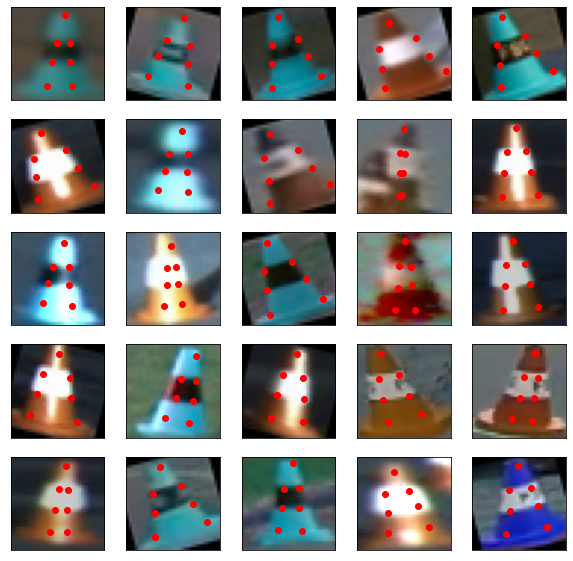

In [65]:
fig = plt.figure(figsize=(10, 10))


for id in range(25):
    ax = fig.add_subplot(5, 5, id + 1, xticks=[], yticks=[])
    plot_keypoints(outputImages[id], keypt_test[id])

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


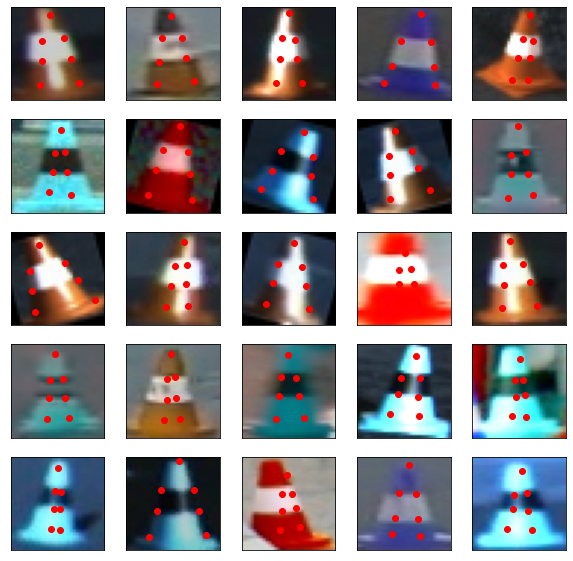

In [230]:
fig = plt.figure(figsize=(10, 10))


for id in range(25):
    ax = fig.add_subplot(5, 5, id + 1, xticks=[], yticks=[])
    plot_keypoints(outputImages[id+ 25], keypt_test[id+ 25])

plt.show()

# Visualizing intermediate convolutions
https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

In [0]:
from tensorflow.keras import models
# model is the cnn whose layers are to be visualised

In [0]:


model_name = CRmodel

def show_conv(image_no):
  img_tensor = X_test[image_no-1:image_no]
  layer_outputs = [layer.output for layer in model_name.layers[:]]
  activation_model = models.Model(inputs=model_name.input, outputs=layer_outputs)
  activations = activation_model.predict(img_tensor)
  plt.imshow(img_tensor[0])
  plot_keypoints(outputImages[image_no], keypt_test[image_no])
  activations = activations[1:]
  layer_names = []
  for layer in model_name.layers[:12]:
      layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

  images_per_row = 16

  for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps

      n_features = layer_activation.shape[-1] # Number of features in the feature map
      size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
      n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
      display_grid = np.zeros((size * n_cols, images_per_row * size))
      for col in range(n_cols): # Tiles each filter into a big horizontal grid
          for row in range(images_per_row):
              channel_image = layer_activation[0,
                                              :, :,
                                              col * images_per_row + row]
              channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, # Displays the grid
                          row * size : (row + 1) * size] = channel_image
      scale = 1. / size
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')



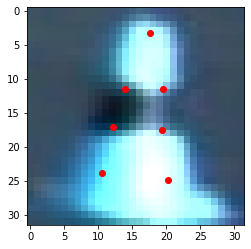

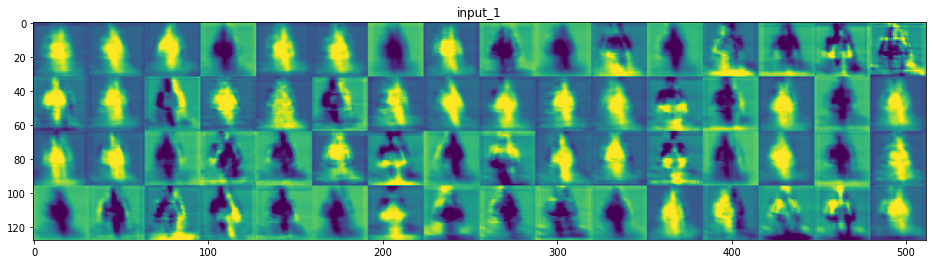

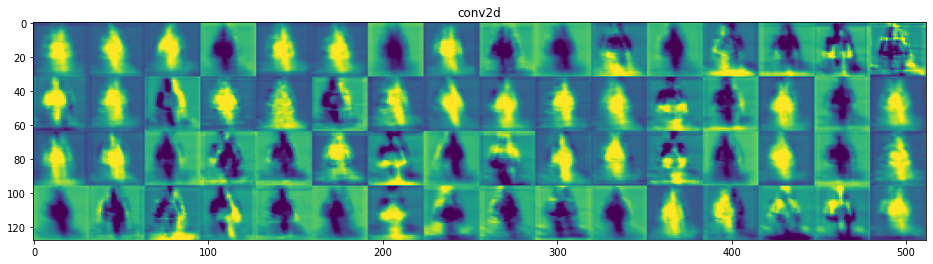

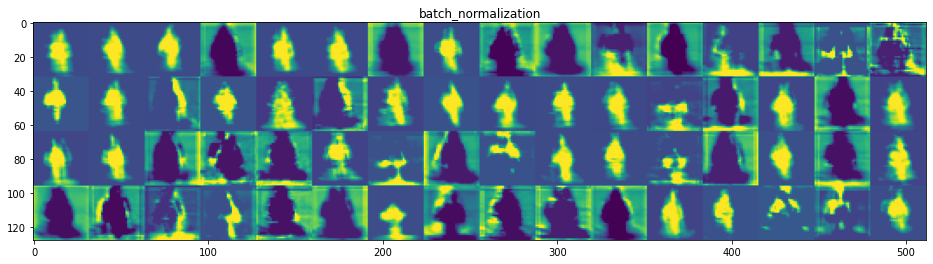

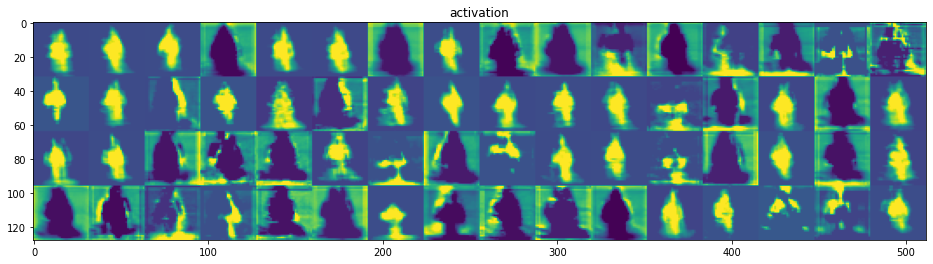

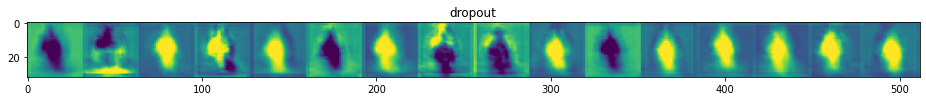

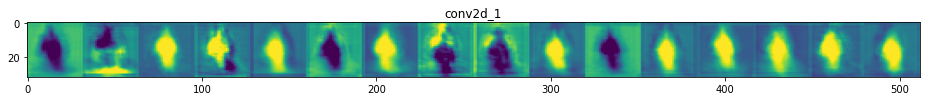

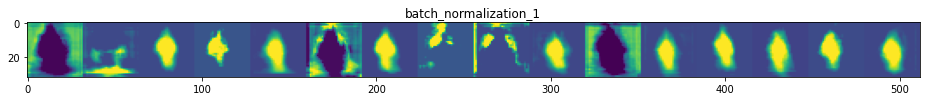

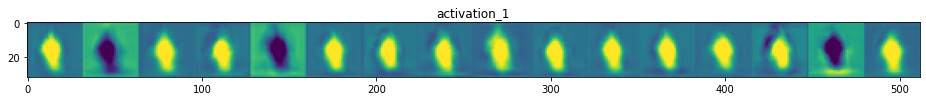

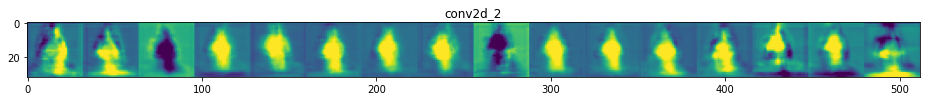

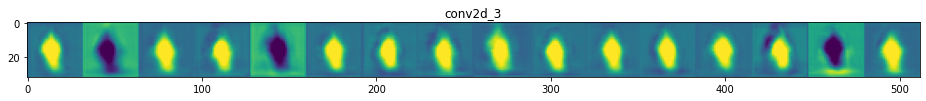

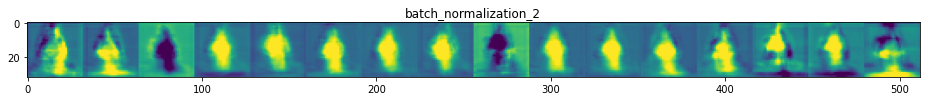

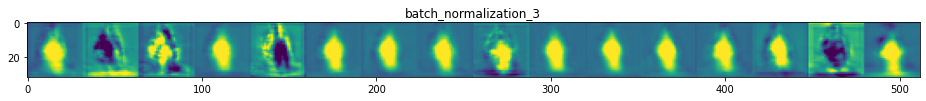

In [238]:
show_conv(image_no = 10
          )

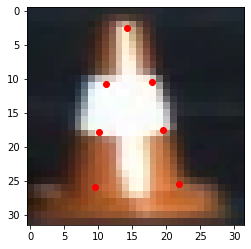

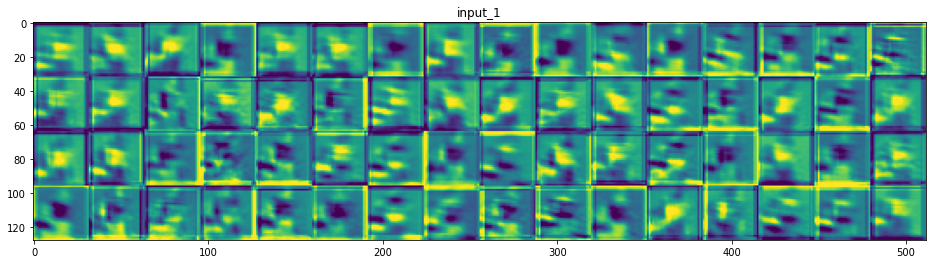

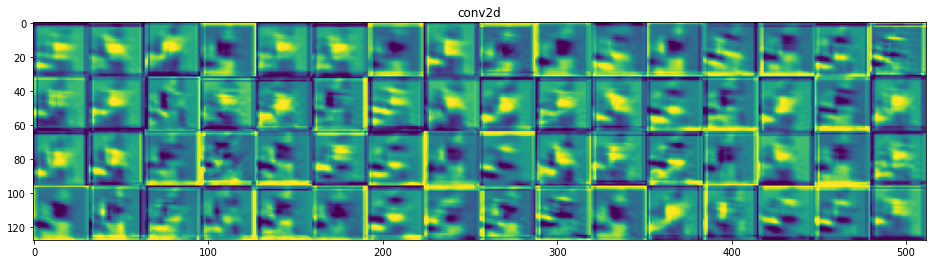

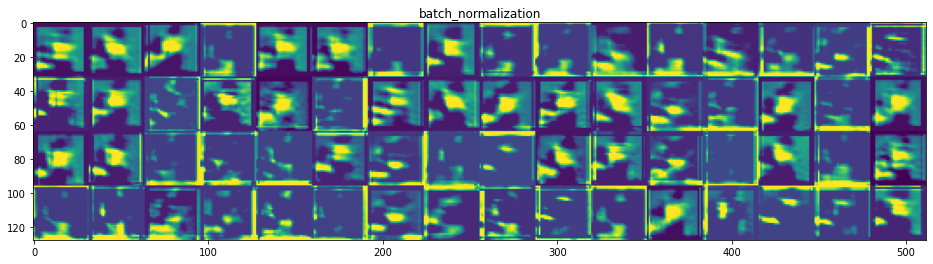

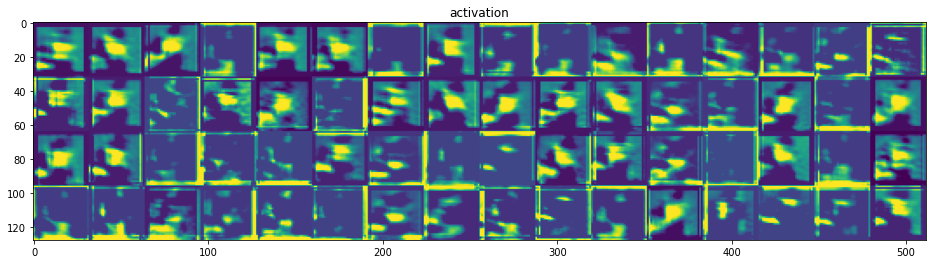

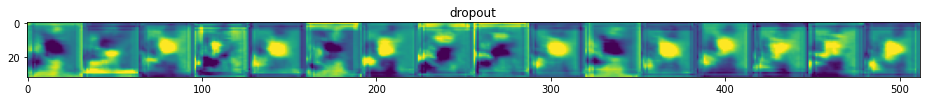

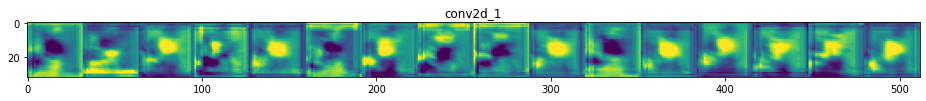

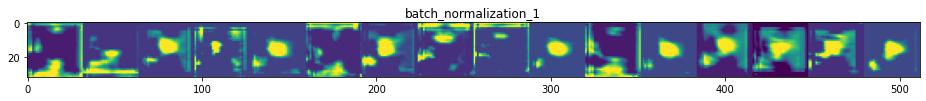

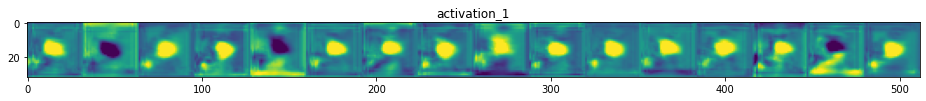

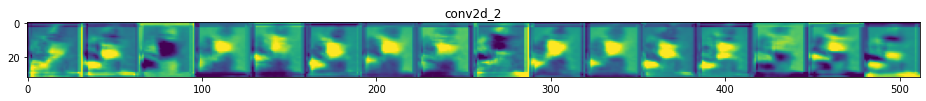

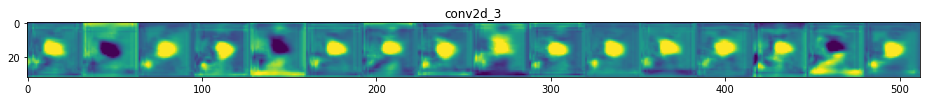

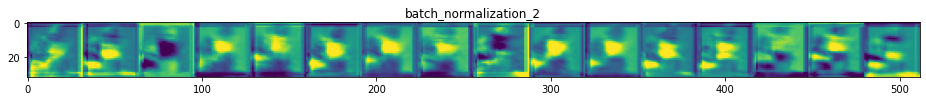

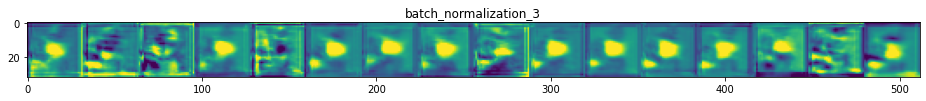

In [239]:
show_conv(image_no = 9)